<a href="https://colab.research.google.com/github/Magister774/Clever-Assessment/blob/main/clever_data_analyst_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Data Upload

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

In [2]:
#Load clover data. NOTE: this code is Colab specific for uploading the Excel file. Please change accordingly if running in another environment.
uploaded = files.upload()

Saving Data Analyst Trial - Data Set.xlsx to Data Analyst Trial - Data Set.xlsx


In [3]:
#Read excel file and its sheets as a list
dfs = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name=None)

#Drop README sheet
dfs.pop('README')

#Save individual sheets as dataframes for analysis
df_sales = dfs['sales']
df_calls = dfs['calls']
df_agents = dfs['agents']
df_customers = dfs['customers']
df_markets = dfs['markets']

#Best Markets Analysis

Initial assumptions for a top  market:

1.   low value for days_on_market_median (homes selling fast)
2.   A high proportions of homes closing relative to the number of listings on the market
3.   A higher ratio of homes closing at prices higher than their list price



In [4]:
df_markets.head() #Initial review of data

,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
0,new_york_ny,"New York-Newark-Jersey City, NY-NJ Metro Area","New York, NY",19756722,58,849000,785000,36156,362,7062,13542
1,los_angeles_ca,"Los Angeles-Long Beach-Anaheim, CA Metro Area","Los Angeles, CA",13012469,55,979000,915000,18409,330,5260,6606
2,chicago_il,"Chicago-Naperville-Elgin, IL-IN Metro Area","Chicago, IL",9359555,52,369900,360000,16751,160,6308,8251
3,dallas_tx,"Dallas-Fort Worth-Arlington, TX Metro Area","Dallas, TX",7807555,64,425611,408386,29448,448,13318,6148
4,houston_tx,"Houston-Pasadena-The Woodlands, TX Metro Area","Houston, TX",7274714,60,349000,329900,33947,1304,10622,5334


In [5]:
df_markets.describe()

,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
count,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,3.657941e+06,46.280000,4.921224e+05,4.823189e+05,10664.580000,204.720000,4020.040000,3345.780000
std,3.328688e+06,19.180177,2.745084e+05,2.773764e+05,9613.251422,225.660305,2941.633102,2381.171923
min,1.154320e+06,12.000000,1.890460e+05,2.058780e+05,1475.000000,6.000000,490.000000,669.000000
25%,1.701003e+06,31.250000,3.276168e+05,3.160040e+05,4588.000000,57.500000,1911.500000,1659.500000
50%,2.477225e+06,44.000000,4.137225e+05,3.950000e+05,7350.000000,142.000000,3417.000000,2540.500000
75%,4.570199e+06,59.750000,5.748370e+05,5.517185e+05,12631.750000,263.500000,5056.000000,4204.000000
max,1.975672e+07,92.000000,1.573032e+06,1.632174e+06,47180.000000,1304.000000,13318.000000,13542.000000


Rather than comparing closed listings in absolute terms (different market sizes and inventory counts make comparisons hard), take the proportion of closed listings to listings on market as a way to compare market activity.

Calculating the Sales to List Ratio is a way to determine how closely listings are selling relative to their original price. If a 1 represents markets where new and closed price are equal, a value greater than 1 represents listings selling for more than they listed (sellers market). Less than 1 represents listings that requireed discounts to sell, possibly indicating a cooling market or oversupply.

In [ ]:
# Divide listings_closed_count by listings_on_market_count for percentage of homes sold relative to listings.
df_markets['closed_listings_rate'] = df_markets['listings_closed_count'] / df_markets['listings_on_market_count']

# Determine how closely homes are selling at relative to the initial price. Values greater than 1 indicate homes selling above initial price
df_markets['sale_to_list_ratio'] = df_markets['price_closed_median'] / df_markets['price_new_list_median']

df_markets.head()

,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count,closed_listings_rate,price_decrease_to_increase_ratio,sale_to_list_ratio
0,buffalo_ny,"Buffalo-Cheektowaga, NY Metro Area","Buffalo, NY",1161385,12,249900,290000,1475,24,490,1026,0.695593,20.416667,1.160464
1,grand_rapids_mi,"Grand Rapids-Wyoming-Kentwood, MI Metro Area","Grand Rapids, MI",1154320,14,349900,355500,1905,8,1000,1342,0.704462,125.000000,1.016005
2,san_jose_ca,"San Jose-Sunnyvale-Santa Clara, CA Metro Area","San Jose, CA",1969353,17,1573032,1632174,1698,66,562,1082,0.637220,8.515152,1.037597
3,san_francisco_ca,"San Francisco-Oakland-Fremont, CA Metro Area","San Francisco, CA",4653593,21,1450000,1482500,6265,126,1900,3069,0.489864,15.079365,1.022414
4,seattle_wa,"Seattle-Tacoma-Bellevue, WA Metro Area","Seattle, WA",4021467,21,843328,832871,9813,108,3986,3716,0.378681,36.907407,0.987600


Top 5 markets are notable for short days on market (under 25 days), a high closing price difference (values greater than 1 mean homes are closing at higher than listing price), and relatively high closed listings rate.

In [ ]:
# Sort columns by days_on_market_median, closed_listings_rate, and closing_price_difference
df_markets = df_markets.sort_values(by=['days_on_market_median', 'sale_to_list_ratio', 'closed_listings_rate'],
                                    ascending=[True, False, True]).reset_index(drop=True)
df_markets.head()

,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count,closed_listings_rate,price_decrease_to_increase_ratio,sale_to_list_ratio
0,buffalo_ny,"Buffalo-Cheektowaga, NY Metro Area","Buffalo, NY",1161385,12,249900,290000,1475,24,490,1026,0.695593,20.416667,1.160464
1,grand_rapids_mi,"Grand Rapids-Wyoming-Kentwood, MI Metro Area","Grand Rapids, MI",1154320,14,349900,355500,1905,8,1000,1342,0.704462,125.000000,1.016005
2,san_jose_ca,"San Jose-Sunnyvale-Santa Clara, CA Metro Area","San Jose, CA",1969353,17,1573032,1632174,1698,66,562,1082,0.637220,8.515152,1.037597
3,san_francisco_ca,"San Francisco-Oakland-Fremont, CA Metro Area","San Francisco, CA",4653593,21,1450000,1482500,6265,126,1900,3069,0.489864,15.079365,1.022414
4,seattle_wa,"Seattle-Tacoma-Bellevue, WA Metro Area","Seattle, WA",4021467,21,843328,832871,9813,108,3986,3716,0.378681,36.907407,0.987600


The top 5 worst performing markets have long days on market values (over 70 days), have a lower closing price difference (they sell at lower values than the initial listing price), and have low closing rates.

In [ ]:
# Sort by the worst five performing markets
df_markets.tail()

,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count,closed_listings_rate,price_decrease_to_increase_ratio,sale_to_list_ratio
45,phoenix_az,"Phoenix-Mesa-Chandler, AZ Metro Area","Phoenix, AZ",4941206,71,490000,465000,18828,492,9428,5217,0.277087,19.162602,0.948980
46,san_antonio_tx,"San Antonio-New Braunfels, TX Metro Area","San Antonio, TX",2612802,83,325189,307287,13452,520,5672,1754,0.130390,10.907692,0.944949
47,jacksonville_fl,"Jacksonville, FL Metro Area","Jacksonville, FL",1645707,85,368992,365000,8828,256,3840,1999,0.226439,15.000000,0.989181
48,austin_tx,"Austin-Round Rock-San Marcos, TX Metro Area","Austin, TX",2357497,88,471261,430657,11484,186,4628,1801,0.156827,24.881720,0.913840
49,miami_fl,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...","Miami, FL",6138876,92,590000,560000,47180,486,10914,7102,0.150530,22.456790,0.949153


Observed trend: A significant amount of markets (75%) have a sale to list ratio under 1. In other words, closing prices are increasingly lower than the initial asking price. More analysis would be needed to determine whether this trend will continue.

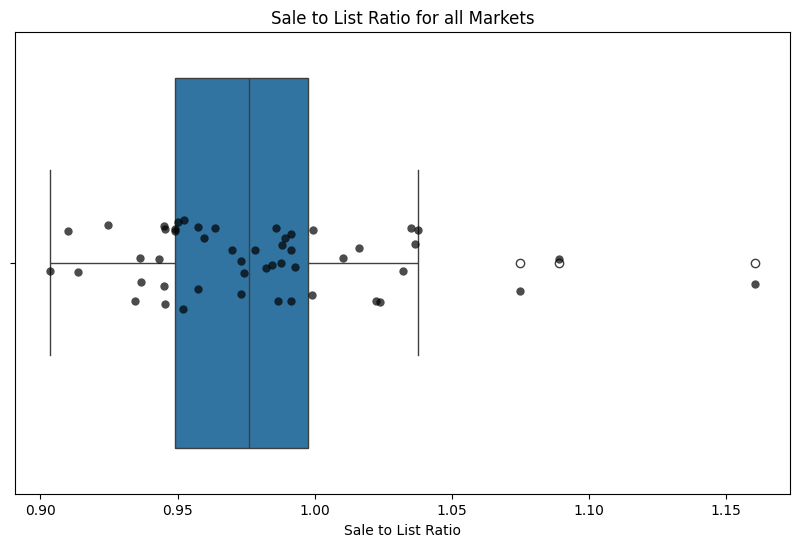

In [ ]:
plt.figure(figsize=(10,6))

# Boxplot
sns.boxplot(x=df_markets['sale_to_list_ratio'])

# Overlay points for each market
sns.stripplot(x=df_markets['sale_to_list_ratio'], color='black', alpha=0.7, size=6)

plt.title('Sale to List Ratio for all Markets')
plt.xlabel('Sale to List Ratio')
plt.show()


#Best Agents Analysis



Initial assumptions:



*   Determine the ratio of 2024 customers to closings. A higher ratio indicates a more successful agent when it comes to closing
*   Higher average customer rating is important, but the absolute number of reviews should be kept in mind.
* Both the total ratio of closings to customers and the average customer rating are important for determining agent performance. Finding a way to blend the two into a composite rating would be an effective way to measure performance.




In [6]:
# Sort agents by market_id
df_agents = df_agents.sort_values(by='market_id').reset_index(drop=True)
df_agents.head()

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024
0,priya_singh_642,Priya,Singh,atlanta_ga,105,90,14,9,3.0,3.66
1,kenji_washington_963,Kenji,Washington,atlanta_ga,251,121,28,25,4.0,4.48
2,jennifer_martinez_498,Jennifer,Martinez,atlanta_ga,10,31,2,12,1.0,4.91
3,camila_hill_63,Camila,Hill,atlanta_ga,243,46,28,5,1.0,4.09
4,joseph_green_589,Joseph,Green,atlanta_ga,62,68,10,8,2.0,3.82


In [8]:
df_agents.describe()

,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024
count,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,998.000000
mean,107.822000,156.879000,16.128000,25.704000,4.604208,3.508056
std,68.352721,114.981708,8.608003,14.611772,3.009957,0.858866
min,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000
25%,51.000000,64.000000,9.000000,13.000000,2.000000,2.760000
50%,98.500000,130.000000,17.000000,26.000000,4.000000,3.490000
75%,153.250000,229.250000,24.000000,38.000000,7.000000,4.260000
max,296.000000,477.000000,30.000000,50.000000,15.000000,5.000000


In [ ]:
df_agents.shape

(1000, 10)

While it's possible that closing buyers and sellers is meaningfully different and worth investigating seperately, the significant differences that some agents have in the number of assigned buyers vs sellers can make comparisons diffcult and potentially biased. A global ratio of closings provides a more agnostic way of evaluating closing performance.

In [ ]:
# Determine the prorportion of customers to closes.
# To avoid complicating ranking with varying levels of buyer and seller customers/closes, I'll combine both into a global close ratio
df_agents['total_customers_sent_2024'] = df_agents['buyer_customers_sent_2024'] + df_agents['seller_customers_sent_2024']
df_agents['total_closing_2024'] = df_agents['buyer_closes_2024'] + df_agents['seller_closes_2024']
df_agents['total_closing_ratio_2024'] = ((df_agents['buyer_closes_2024'] + df_agents['seller_closes_2024']) /
    (df_agents['buyer_customers_sent_2024'] + df_agents['seller_customers_sent_2024'])).round(2)
df_agents.head()

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,total_customers_sent_2024,total_closing_2024,total_closing_ratio_2024
0,priya_singh_642,Priya,Singh,atlanta_ga,105,90,14,9,3.0,3.66,195,23,0.12
1,kenji_washington_963,Kenji,Washington,atlanta_ga,251,121,28,25,4.0,4.48,372,53,0.14
2,jennifer_martinez_498,Jennifer,Martinez,atlanta_ga,10,31,2,12,1.0,4.91,41,14,0.34
3,camila_hill_63,Camila,Hill,atlanta_ga,243,46,28,5,1.0,4.09,289,33,0.11
4,joseph_green_589,Joseph,Green,atlanta_ga,62,68,10,8,2.0,3.82,130,18,0.14


Agents have average ratings from customers in 2024, as well as the number of customer reviews. Using avg_rating_2024 unweighted can be unreliable if the number of reviews is very small, leading to a scenario where a agent with a single 5.00 rating is ranked higher than an agent with 15 ratings and an average of 4.88.

Bayesian shrinkage can mitigate this issue. Shrinkage is a technique where the average rating is weighted by the average number of ratings. Agents with fewer than average ratings have their average weighted more towards the global mean, while those with more ratings have an average that's closer to their raw rating.

In [ ]:
# Calculate the global average rating and average number of reviews
global_avg_rating = df_agents['avg_rating_2024'].mean()
global_avg_reviews = df_agents['customer_reviews_2024'].mean()

# Created weighted average rating based on global averages
df_agents['weighted_avg_rating_2024'] = (df_agents['customer_reviews_2024'] * df_agents['avg_rating_2024']
                                         + global_avg_reviews * global_avg_rating) / (df_agents['customer_reviews_2024'] + global_avg_reviews)

# Round weighted rating
df_agents['weighted_avg_rating_2024'] = df_agents['weighted_avg_rating_2024'].round(2)

In [ ]:
df_agents.head()

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,total_customers_sent_2024,total_closing_2024,total_closing_ratio_2024,weighted_avg_rating_2024
0,priya_singh_642,Priya,Singh,atlanta_ga,105,90,14,9,3.0,3.66,195,23,0.12,3.57
1,kenji_washington_963,Kenji,Washington,atlanta_ga,251,121,28,25,4.0,4.48,372,53,0.14,3.96
2,jennifer_martinez_498,Jennifer,Martinez,atlanta_ga,10,31,2,12,1.0,4.91,41,14,0.34,3.76
3,camila_hill_63,Camila,Hill,atlanta_ga,243,46,28,5,1.0,4.09,289,33,0.11,3.61
4,joseph_green_589,Joseph,Green,atlanta_ga,62,68,10,8,2.0,3.82,130,18,0.14,3.60


Since there are two values that can plausibly be used for rating an agent, I can utilize rank-based scoring to combine both. This converts total_closing_ratio_2024 and weighted_avg_rating_2024 into ranks, with higher performance getting a smaller rank number, such as 1. The ranks are then averaged per agent, per market, with the best performing agent having the lowest average.

In [ ]:
# Rank total_closing_ratio_2024 by market
df_agents['rating_rank_2024'] = df_agents.groupby('market_id')['weighted_avg_rating_2024'].rank(ascending=False)

# Rank closing_rank_2024 by market
df_agents['closing_rank_2024'] = df_agents.groupby('market_id')['total_closing_ratio_2024'].rank(ascending=False)

# Average rank across both metrics by market
df_agents['avg_combined_rank_2024'] = (
    df_agents['rating_rank_2024'] + df_agents['closing_rank_2024']
) / 2


By combining ranks for both avg_rating and total_closing_ratio, a complete picture of agent performance can be glimpsed. Agents who are strong in both the proprotion of customers that turn into closings and in customer ratings are the top contendors for best agent in their market.

In [ ]:
# Get the index of the best agent per market (lowest rank)
best_agent_indices = df_agents.groupby('market_id')['avg_combined_rank_2024'].idxmin()

# Filter to keep only those rows
df_best_agents = df_agents.loc[best_agent_indices].reset_index(drop=True)
df_best_agents.head()

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,total_customers_sent_2024,total_closing_2024,total_closing_ratio_2024,weighted_avg_rating_2024,rating_rank_2024,closing_rank_2024,avg_combined_rank_2024
0,kwame_patel_238,Kwame,Patel,atlanta_ga,33,45,9,18,3.0,4.23,78,27,0.35,3.79,3.0,1.0,2.00
1,priya_torres_315,Priya,Torres,austin_tx,39,92,4,24,5.0,4.62,131,28,0.21,4.09,1.0,5.5,3.25
2,arjun_martinez_306,Arjun,Martinez,baltimore_md,73,187,15,47,2.0,4.55,260,62,0.24,3.82,3.0,1.0,2.00
3,linda_jackson_955,Linda,Jackson,birmingham_al,137,232,23,34,7.0,4.28,369,57,0.15,3.97,2.0,6.5,4.25
4,mary_baker_972,Mary,Baker,boston_ma,245,120,28,48,14.0,4.99,365,76,0.21,4.62,1.0,4.0,2.50


Top agents either match or exceed both the global average customer rating and the average close rate.

In [ ]:
# Summary stats for top agents in all markets
summary = {
    'avg_rating': df_best_agents['weighted_avg_rating_2024'].mean().round(1),
    'avg_close': (df_best_agents['total_closing_ratio_2024'].mean()*100).round(0),
    'avg_rank': df_best_agents['avg_combined_rank_2024'].mean().round(1),  # How dominant are these #1s?
    'perfect_leaders': len(df_best_agents[df_best_agents['avg_combined_rank_2024'] <= 1.5])  # Ties for #1
}

print(f"Summary: {50} markets covered")
print(f"Avg rating among top agents: {summary['avg_rating']}")
print(f"Avg close rate among top agents: {summary['avg_close']}%")
print(f"Avg rank of top agents: {summary['avg_rank']} (lower = stronger close rate & customer rating)")


Summary: 50 markets covered
Avg rating among top agents: 4.0
Avg close rate among top agents: 25.0%
Avg rank of top agents: 2.9 (lower = stronger close rate & customer rating)


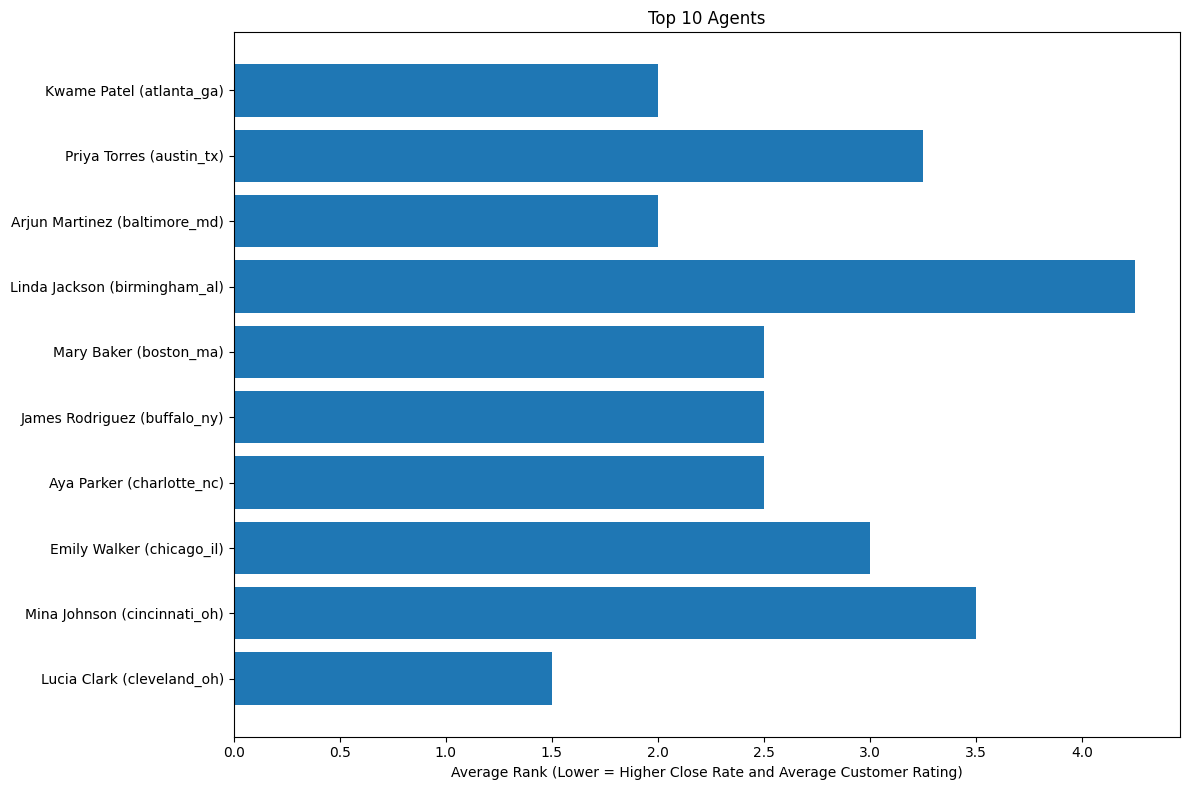

In [ ]:
# Get first 10 markets alphabetically
top10_agents = df_best_agents.sort_values('market_id').head(10).copy().reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top10_agents)), top10_agents['avg_combined_rank_2024'])
plt.yticks(range(len(top10_agents)),
           [f"{row['first_name']} {row['last_name']} ({row['market_id']})"
            for _, row in top10_agents.iterrows()])
plt.xlabel('Average Rank (Lower = Higher Close Rate and Average Customer Rating)')
plt.title('Top 10 Agents')
plt.gca().invert_yaxis()  # Flip so #1 is at top
plt.tight_layout()
plt.show()


While some top agents are stronger in terms of close rates or average customer ratings, their key commonality is that they either closely match or exceed the global averages for both metrics. Top agents overperform in both areas relative to their in-market peers.

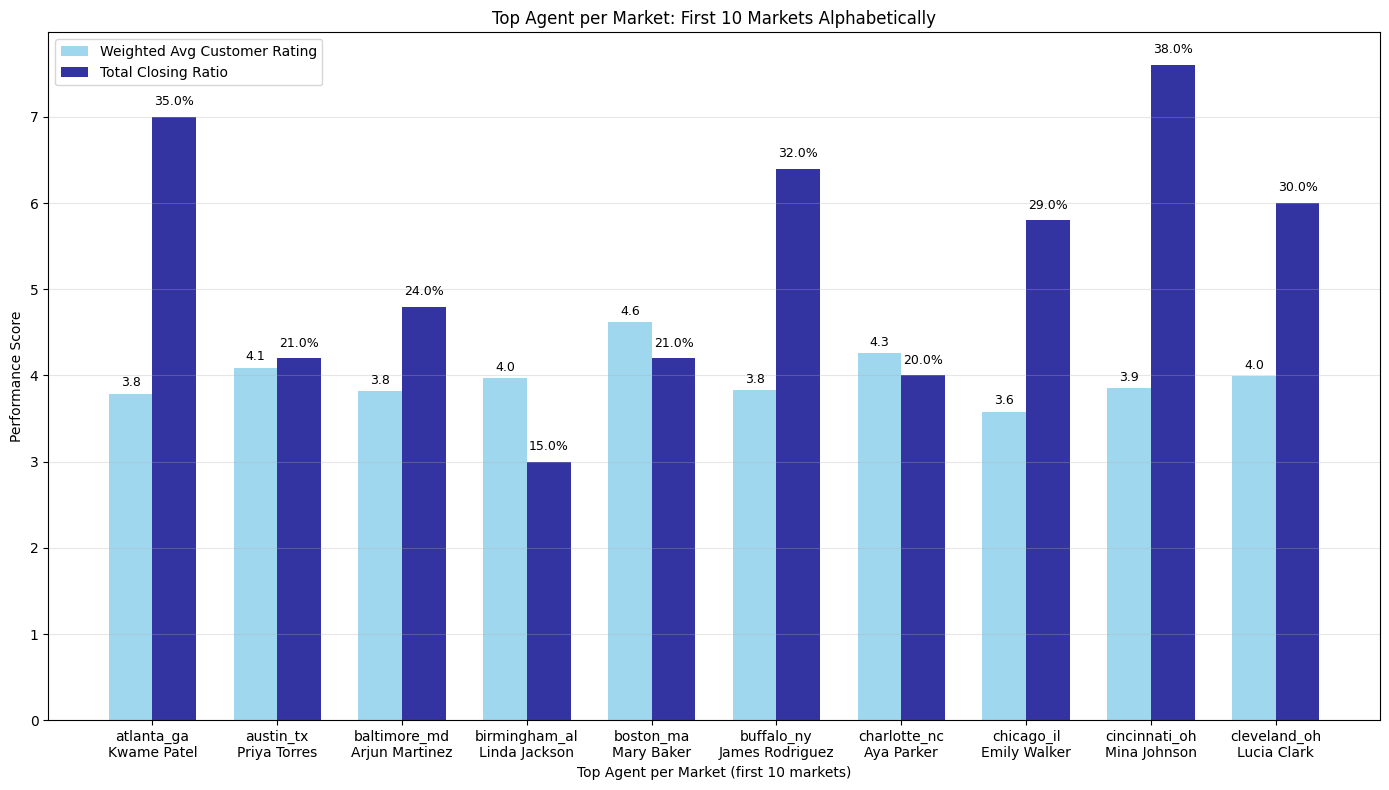

In [ ]:
# Prepare data for grouped bars
x = np.arange(len(top10_agents))  # Position for each market (0-9)
width = 0.35  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Customer Rating bars
bars1 = ax.bar(x - width/2,
               top10_agents['weighted_avg_rating_2024'],
               width, label='Weighted Avg Customer Rating', alpha=0.8, color='skyblue')

# Closing ratio bars (scaled to match rating range)
bars2 = ax.bar(x + width/2,
               top10_agents['total_closing_ratio_2024'] * 20,
               width, label='Total Closing Ratio', alpha=0.8, color='darkblue')

# Labels
ax.set_xlabel('Top Agent per Market (first 10 markets)')
ax.set_ylabel('Performance Score')
ax.set_title('Top Agent per Market: First 10 Markets Alphabetically')
ax.set_xticks(x)
ax.set_xticklabels([f"{row['market_id']}\n{row['first_name']} {row['last_name']}"
                   for _, row in top10_agents.iterrows()],
                   rotation=0, ha='center', fontsize=10)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height/20:.1%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



## Area for Growth Analysis

Are calls a good indicator of market activity/interest? How does this compare with 2025 sales in those given markets? Taken together, could this reveal markets that aren't fully realized in terms of potential?

In [ ]:
# Join calls and customers together so that customer info appears in the call logs
df_calls_customers = pd.merge(df_calls, df_customers[['customer_id', 'first_name', 'last_name', 'market_id', 'assigned_agent']],
                              on='customer_id', how='left')
df_calls_customers.head()

,call_id,customer_id,call_date,disposition,call_handler,first_name,last_name,market_id,assigned_agent
0,1,1,1/1/25 0:56,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72
1,2,1,1/4/25 0:21,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72
2,3,2,1/1/25 2:31,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808
3,4,2,1/3/25 15:50,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808
4,5,2,1/4/25 12:45,Talked to Customer,Vivian,Josephine,Darakjy,phoenix_az,sofia_smith_808


In [ ]:
# Join the enriched calls dataframe with sales so that any sales made by a calling customer are displayed.
df_calls_sales = pd.merge(df_calls_customers, df_sales[['customer_id', 'sale_date', 'amount']],
                          on='customer_id', how='left')
df_calls_sales.head()

,call_id,customer_id,call_date,disposition,call_handler,first_name,last_name,market_id,assigned_agent,sale_date,amount
0,1,1,1/1/25 0:56,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72,NaN,NaN
1,2,1,1/4/25 0:21,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72,NaN,NaN
2,3,2,1/1/25 2:31,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808,1/4/2025 12:45:00,232562.0
3,4,2,1/3/25 15:50,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808,1/4/2025 12:45:00,232562.0
4,5,2,1/4/25 12:45,Talked to Customer,Vivian,Josephine,Darakjy,phoenix_az,sofia_smith_808,1/4/2025 12:45:00,232562.0


In [ ]:
# Parse dates into the same format
df_calls_sales['call_date'] = pd.to_datetime(df_calls_sales['call_date'])
df_calls_sales['sale_date'] = pd.to_datetime(df_calls_sales['sale_date'], errors='coerce')

# Create closed_listing column
df_calls_sales['closed_listing'] = np.where(df_calls_sales['call_date'] == df_calls_sales['sale_date'], 'Y', 'N')

df_calls_sales.head()

/tmp/ipython-input-2976620692.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_calls_sales['call_date'] = pd.to_datetime(df_calls_sales['call_date'])


,call_id,customer_id,call_date,disposition,call_handler,first_name,last_name,market_id,assigned_agent,sale_date,amount,closed_listing
0,1,1,2025-01-01 00:56:00,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72,NaT,NaN,N
1,2,1,2025-01-04 00:21:00,Voicemail,NaN,James,Butt,fresno_ca,yuki_ali_72,NaT,NaN,N
2,3,2,2025-01-01 02:31:00,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808,2025-01-04 12:45:00,232562.0,N
3,4,2,2025-01-03 15:50:00,Voicemail,NaN,Josephine,Darakjy,phoenix_az,sofia_smith_808,2025-01-04 12:45:00,232562.0,N
4,5,2,2025-01-04 12:45:00,Talked to Customer,Vivian,Josephine,Darakjy,phoenix_az,sofia_smith_808,2025-01-04 12:45:00,232562.0,Y


Compared to the earlier analysis of top markets, some markets that are generating high volumes of calls are not surprising (Seattle), but the presense of worse performing markets (Miami, Phoenix) high on the list is notable. Markets with high call volumes could be areas worth focusing on if call volumes correlate with desire or activity.

In [ ]:
# Determine the number of unique customer calls and the number of closed listings for 2025
market_summary = df_calls_sales.groupby('market_id').agg(
    unique_customer_calls=('customer_id', lambda x: x.nunique()),
    number_of_closed_listings=('closed_listing', lambda x: (x == 'Y').sum())
).reset_index()

# Sort by the highest number of unique callers
market_summary = market_summary.sort_values('unique_customer_calls', ascending=False).reset_index(drop=True)
market_summary

,market_id,unique_customer_calls,number_of_closed_listings
0,salt_lake_city_ut,1061,293
1,seattle_wa,1050,323
2,san_francisco_ca,1045,284
3,sacramento_ca,1040,298
4,boston_ma,1040,266
5,las_vegas_nv,1036,313
6,cleveland_oh,1036,282
7,philadelphia_pa,1035,299
8,miami_fl,1032,300
9,kansas_city_mo,1031,289


In [ ]:
market_summary.describe()

,unique_customer_calls,number_of_closed_listings
count,50.000000,50.00000
mean,1000.000000,283.52000
std,31.548473,16.52239
min,929.000000,237.00000
25%,977.000000,273.25000
50%,1003.500000,282.00000
75%,1025.500000,294.50000
max,1061.000000,323.00000


Calculating Pearson's R between the number of unique callers and the total number of closed listings reveals a moderately positive relationship. Markets that have more unique callers tend to have more closed listings, but there could be other impacts driving closed listings that aren't immediately apparent.

If the volume of unique callers can be viewed as a proxy for interest/knowledge in Smiley Real Estate, then markets with lower numbers of unique callers are opportunities for more intense marketing efforts to increase the potential for closed listings.

In [ ]:
from scipy.stats import pearsonr

# Run a Pearson's Corrrelation to determine what, if any, relationship exists between calls and closed listings
corr_coef, p_value = pearsonr(
    market_summary['unique_customer_calls'],
    market_summary['number_of_closed_listings']
)

print(f"Pearson's R: {corr_coef:.3f}, p-value: {p_value:.3f}")

Pearson's R: 0.429, p-value: 0.002
